## Assignment : Implement the otsu method of image segmentation from scratch and segment the given image into background and foreground.



In [14]:
# Importing Neccessary Libraries
import warnings
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

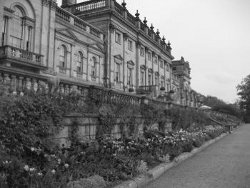

In [3]:
#Loading and opening given image
image = Image.open('org.jpg').convert("L")
# Original Image converted to grayscale image
image

In [4]:
# Converting image to numpy array

image = np.asarray(image)
print(image.shape)
print(image)

(188, 250)
[[118 127 133 ... 213 211 211]
 [125 128 130 ... 213 213 213]
 [119 124 130 ... 214 213 213]
 ...
 [ 36  54  44 ... 109 101 101]
 [ 37  52  47 ... 112 101 101]
 [ 39  50  51 ... 104  99  99]]


In [5]:
# Function for ploting histogram for frequencies of all pixel values

def histogram(image):
    row, col = image.shape 
    freq = np.zeros(256)
    for i in range(0,row):
        for j in range(0,col):
            freq[image[i, j]] += 1
    x = np.arange(0,256)
    plt.bar(x, freq, color='b', width=5, align='center')
    plt.show()
    return freq

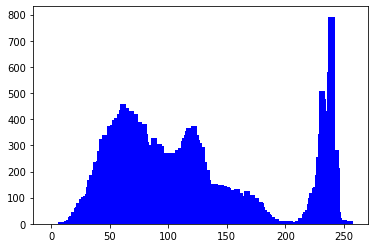

array([  0.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   6.,   2.,   5.,
         4.,   8.,   9.,  11.,  14.,  15.,  25.,  31.,  47.,  47.,  39.,
        62.,  65.,  80.,  74.,  94.,  79., 102., 103., 106., 113., 140.,
       166., 162., 185., 177., 204., 236., 238., 232., 239., 279., 323.,
       304., 280., 341., 281., 335., 332., 373., 356., 372., 379., 396.,
       372., 403., 406., 399., 421., 434., 458., 409., 421., 443., 408.,
       384., 406., 432., 390., 406., 403., 420., 378., 388., 389., 380.,
       353., 349., 381., 344., 314., 290., 290., 301., 299., 277., 289.,
       327., 290., 270., 255., 304., 252., 298., 266., 262., 239., 264.,
       271., 248., 270., 243., 251., 245., 244., 269., 262., 281., 270.,
       259., 288., 284., 318., 327., 322., 341., 354., 367., 358., 313.,
       356., 373., 336., 340., 319., 309., 293., 246., 293., 215., 236.,
       197., 207., 169., 135., 148., 140., 154., 127., 151., 144., 144.,
       128., 148., 148., 115., 139., 146., 133., 13

In [8]:
#ploting histogram for frequencies of all pixel values

freq = histogram(image)
freq


In [9]:
#Applying Otsu method

def otsu(image, freq):
    row, col = image.shape
    min_variance = np.inf
    threshold = -1;
    for t in range(256):
        weight_b = np.sum(freq[:t])/(row*col)
        weight_f = np.sum(freq[t:])/(row*col)
        
        mean_b = np.sum(np.array([i*freq[i] for i in range(t)]))/np.sum(np.array([freq[i] for i in range(t)]))
        mean_f = np.sum(np.array([i*freq[i] for i in range(t, 256)]))/np.sum(np.array([freq[i] for i in range(t, 256)]))
        
        variance_b = np.sum(np.array([(i-mean_b)**2 * freq[i] for i in range(t)]))/np.sum(np.array([freq[i] for i in range(t)]))
        variance_f = np.sum(np.array([(i-mean_f)**2 * freq[i] for i in range(t, 256)]))/np.sum(np.array([freq[i] for i in range(t, 256)]))
        
        within_class_variance = weight_b * variance_b + weight_f * variance_f
        if within_class_variance < min_variance:
            min_variance = within_class_variance
            threshold = t
    return threshold

In [15]:
#Finding threshold

threshold = otsu(image, freq)
threshold

147

In [12]:
# Convert the background pixels to white and foreground pixels to black

final = image.copy()
final[image > threshold] = 255 # convert to white
final[image < threshold] = 0 # convert to black

final

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

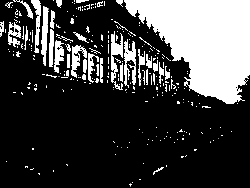

In [13]:
Image.fromarray(final)

##Thus this is the required segmented image!


### Submitted By:
```
Subham Sharma
Roll no. 58 😊
```

